In [1]:
import pandas as pd
from difflib import SequenceMatcher

# Load the overallApps DataFrame
overall_apps = pd.read_csv('overallApps.csv')

# Remove rows with null or missing titles
overall_apps.dropna(subset=['title'], inplace=True)

# Remove duplicate titles
overall_apps.drop_duplicates(subset='title', keep='first', inplace=True)

# Calculate similarity between title attributes
def calculate_similarity(title1, title2):
    return SequenceMatcher(None, title1, title2).ratio()

# Create a dictionary to store similar titles
similar_titles = {}

# Iterate over the title column
for i in range(len(overall_apps)):
    for j in range(i+1, len(overall_apps)):
        title1 = overall_apps.iloc[i]['title']
        title2 = overall_apps.iloc[j]['title']
        similarity = calculate_similarity(title1, title2)
        if similarity > 0.75:
            similar_titles[title1] = title2

# Remove rows with similar titles
for title, similar in similar_titles.items():
    overall_apps = overall_apps[~(overall_apps['title'] == similar)]

# Save the updated DataFrame
#overall_apps.to_csv('updated_overallApps.csv', index=False)

# Create a dataset for approved apps
approved_apps = overall_apps[overall_apps['approved'] == True]

# Create a dataset for non-approved apps
non_approved_apps = overall_apps[overall_apps['approved'] == False]

# Save the DataFrame to Excel
approved_apps.to_csv('approvedApps.csv', index=False)
non_approved_apps.to_csv('nonApprovedApps.csv', index=False)

In [2]:
# Load the data
approved_apps = pd.read_csv('approved_Apps.csv')
non_approved_apps = pd.read_csv('nonApproved_Apps.csv')

# Print the number of apps in each category
print(f"Number of Approved Apps: {len(approved_apps)}")
print(f"Number of Non-Approved Apps: {len(non_approved_apps)}")

# Updated function to calculate word frequencies for specific values
def calculate_specific_word_frequencies(df, dataset_name, criterion_columns):
    print(f"{dataset_name} Specific Word Frequencies:")
    
    specific_word_freq = {}
    
    for criterion, conditions in criterion_columns.items():
        print(f"**{criterion}**")
        specific_word_freq[criterion] = {}
        
        for condition in conditions:
            col, value = condition.split('==')
            col = col.strip()  # Clean column name
            value = value.strip().strip("'").lower()  # Clean and convert the value to lowercase
            
            if col in df.columns and pd.api.types.is_string_dtype(df[col]):
                # Check for value as a substring (case insensitive)
                freq = df[col].apply(lambda x: value in str(x).lower() if isinstance(x, str) else False).sum()
                specific_word_freq[criterion][value] = freq
                print(f"{value}: {freq}")
            else:
                print(f"Column {col} is not a string column or doesn't exist, skipping...")

        print()
    return specific_word_freq

# Define the updated criterion columns
criterion_columns = {
    'User Input': ["inputs == 'Diary'", "inputs == 'Surveys'"],
    'Content Customization': ["engagements == 'User Generated Data'"],
    'Feedback Mechanisms': [
        "engagements == 'AI Support'", "engagements == 'Real Time Response'", "engagements == 'Peer Support'", 
        "engagements == 'Chat/Message'", "engagements == 'Network Support'", 
        "engagements == 'Collaborative With Provider/Other'", "engagements == 'Asynchronous Response'", 
        "features == 'Goal Setting/Habits'", "features == 'Track Mood'", "features == 'Track Symptoms'", 
        "features == 'Track Sleep'", "features == 'Track Medication'", "features == 'Journaling'"
    ],
    'Integration with Other Data Sources': ["inputs == 'External Devices'"],
    'User Engagement Features': ["engagements == 'Audio/Music/Scripts'", "engagements == 'Gamification (Points/Badges)'", 
                                 "engagements == 'Videos'", "engagements == 'Assessments/Screenings'"]
}

# Calculate specific word frequencies for Approved apps
approved_apps_specific_freq = calculate_specific_word_frequencies(approved_apps, "Approved Apps", criterion_columns)

# Calculate specific word frequencies for Non-Approved apps
non_approved_apps_specific_freq = calculate_specific_word_frequencies(non_approved_apps, "Non-Approved Apps", criterion_columns)


# Define the weights for each criterion (the same as before)
weights = {
    'User Input': 0.25,
    'Content Customization': 0.25,
    'User Engagement Features': 0.20,
    'Feedback Mechanisms': 0.20,
    'Integration with Other Data Sources': 0.10
}


# Calculate the weighted score using the new specific word frequencies
def calculate_weighted_score(specific_freq, total_apps):
    weighted_scores = {}
    for criterion, weight in weights.items():
        criterion_score = 0
        if criterion in specific_freq:
            for value, freq in specific_freq[criterion].items():
                proportion = freq / total_apps
                weighted_proportion = proportion * weight
                criterion_score += weighted_proportion
        weighted_scores[criterion] = criterion_score
    return weighted_scores

# Get the total number of apps for approved and non-approved datasets
total_approved_apps = len(approved_apps)
total_non_approved_apps = len(non_approved_apps)

# Calculate the weighted score for Approved apps using the specific frequencies
approved_apps_weighted_scores = calculate_weighted_score(approved_apps_specific_freq, total_approved_apps)

# Calculate the weighted score for Non-Approved apps using the specific frequencies
non_approved_apps_weighted_scores = calculate_weighted_score(non_approved_apps_specific_freq, total_non_approved_apps)

# Print the weighted scores
print("\nApproved Apps Weighted Scores:")
for criterion, score in approved_apps_weighted_scores.items():
    print(f"{criterion}: {score:.4f}")

print("\nNon-Approved Apps Weighted Scores:")
for criterion, score in non_approved_apps_weighted_scores.items():
    print(f"{criterion}: {score:.4f}")

# Calculate the total personalization score
approved_apps_total_score = sum(approved_apps_weighted_scores.values())
non_approved_apps_total_score = sum(non_approved_apps_weighted_scores.values())

# Print the total personalization scores
print("\nTotal Personalization Scores:")
print(f"Approved Apps: {approved_apps_total_score:.4f}")
print(f"Non-Approved Apps: {non_approved_apps_total_score:.4f}")

Number of Approved Apps: 72
Number of Non-Approved Apps: 51
Approved Apps Specific Word Frequencies:
**User Input**
diary: 36
surveys: 44

**Content Customization**
user generated data: 56

**Feedback Mechanisms**
ai support: 10
real time response: 8
peer support: 11
chat/message: 11
network support: 12
collaborative with provider/other: 5
asynchronous response: 7
goal setting/habits: 29
track mood: 31
track symptoms: 23
track sleep: 14
track medication: 3
journaling: 34

**Integration with Other Data Sources**
external devices: 11

**User Engagement Features**
audio/music/scripts: 55
gamification (points/badges): 37
videos: 29
assessments/screenings: 21

Non-Approved Apps Specific Word Frequencies:
**User Input**
diary: 26
surveys: 33

**Content Customization**
user generated data: 39

**Feedback Mechanisms**
ai support: 10
real time response: 8
peer support: 14
chat/message: 19
network support: 6
collaborative with provider/other: 11
asynchronous response: 10
goal setting/habits: 23


In [3]:
import ast

# Personalization Score Totally Free apps vs. Paid apps

# Combine both datasets into one for filtering
combined_apps = pd.concat([approved_apps, non_approved_apps], ignore_index=True)

# Create datasets for Totally Free apps and Paid apps
totally_free_apps = combined_apps[combined_apps['costs'].apply(lambda x: 'Totally Free' in x)]

# Create a new dataset with the rest of the data
paid_apps = combined_apps[~combined_apps['costs'].apply(lambda x: 'Totally Free' in x)]

# Print the number of apps in each category
print(f"Number of Totally Free Apps: {len(totally_free_apps)}")
print(f"Number of Paid Apps: {len(paid_apps)}")

# Updated function to calculate word frequencies for specific values
def calculate_specific_word_frequencies(df, dataset_name, criterion_columns):
    print(f"{dataset_name} Specific Word Frequencies:")
    
    specific_word_freq = {}
    
    for criterion, conditions in criterion_columns.items():
        print(f"**{criterion}**")
        specific_word_freq[criterion] = {}
        
        for condition in conditions:
            col, value = condition.split('==')
            col = col.strip()  # Clean column name
            value = value.strip().strip("'").lower()  # Clean and convert the value to lowercase
            
            if col in df.columns and pd.api.types.is_string_dtype(df[col]):
                # Check for value as a substring (case insensitive)
                freq = df[col].apply(lambda x: value in str(x).lower() if isinstance(x, str) else False).sum()
                specific_word_freq[criterion][value] = freq
                print(f"{value}: {freq}")
            else:
                print(f"Column {col} is not a string column or doesn't exist, skipping...")

        print()
    return specific_word_freq

# Define the updated criterion columns
criterion_columns = {
    'User Input': ["inputs == 'Diary'", "inputs == 'Surveys'"],
    'Content Customization': ["engagements == 'User Generated Data'"],
    'Feedback Mechanisms': [
        "engagements == 'AI Support'", "engagements == 'Real Time Response'", "engagements == 'Peer Support'", 
        "engagements == 'Chat/Message'", "engagements == 'Network Support'", 
        "engagements == 'Collaborative With Provider/Other'", "engagements == 'Asynchronous Response'", 
        "features == 'Goal Setting/Habits'", "features == 'Track Mood'", "features == 'Track Symptoms'", 
        "features == 'Track Sleep'", "features == 'Track Medication'", "features == 'Journaling'"
    ],
    'Integration with Other Data Sources': ["inputs == 'External Devices'"],
    'User Engagement Features': ["engagements == 'Audio/Music/Scripts'", "engagements == 'Gamification (Points/Badges)'", 
                                 "engagements == 'Videos'", "engagements == 'Assessments/Screenings'"]
}

# Calculate specific word frequencies for Totally Free apps
totally_free_apps_specific_freq = calculate_specific_word_frequencies(totally_free_apps, "Totally Free Apps", criterion_columns)

# Calculate specific word frequencies for Paid apps
paid_apps_specific_freq = calculate_specific_word_frequencies(paid_apps, "Paid Apps", criterion_columns)

# Define the weights for each criterion (the same as before)
weights = {
    'User Input': 0.25,
    'Content Customization': 0.25,
    'User Engagement Features': 0.20,
    'Feedback Mechanisms': 0.20,
    'Integration with Other Data Sources': 0.10
}

# Calculate the weighted score using the new specific word frequencies
def calculate_weighted_score(specific_freq, total_apps):
    weighted_scores = {}
    for criterion, weight in weights.items():
        criterion_score = 0
        if criterion in specific_freq:
            for value, freq in specific_freq[criterion].items():
                proportion = freq / total_apps
                weighted_proportion = proportion * weight
                criterion_score += weighted_proportion
        weighted_scores[criterion] = criterion_score
    return weighted_scores

# Get the total number of apps for Totally Free and Paid datasets
total_totally_free_apps = len(totally_free_apps)
total_paid_apps = len(paid_apps)

# Calculate the weighted score for Totally Free apps using the specific frequencies
totally_free_apps_weighted_scores = calculate_weighted_score(totally_free_apps_specific_freq, total_totally_free_apps)

# Calculate the weighted score for Paid apps using the specific frequencies
paid_apps_weighted_scores = calculate_weighted_score(paid_apps_specific_freq, total_paid_apps)

# Print the weighted scores
print("\nTotally Free Apps Weighted Scores:")
for criterion, score in totally_free_apps_weighted_scores.items():
    print(f"{criterion}: {score:.4f}")

print("\nPaid Apps Weighted Scores:")
for criterion, score in paid_apps_weighted_scores.items():
    print(f"{criterion}: {score:.4f}")

# Calculate the total personalization score
totally_free_apps_total_score = sum(totally_free_apps_weighted_scores.values())
paid_apps_total_score = sum(paid_apps_weighted_scores.values())

# Print the total personalization scores
print("\nTotal Personalization Scores:")
print(f"Totally Free Apps: {totally_free_apps_total_score:.4f}")
print(f"Paid Apps: {paid_apps_total_score:.4f}")


Number of Totally Free Apps: 30
Number of Paid Apps: 93
Totally Free Apps Specific Word Frequencies:
**User Input**
diary: 18
surveys: 17

**Content Customization**
user generated data: 23

**Feedback Mechanisms**
ai support: 2
real time response: 4
peer support: 7
chat/message: 7
network support: 6
collaborative with provider/other: 4
asynchronous response: 4
goal setting/habits: 11
track mood: 14
track symptoms: 11
track sleep: 5
track medication: 1
journaling: 16

**Integration with Other Data Sources**
external devices: 1

**User Engagement Features**
audio/music/scripts: 16
gamification (points/badges): 14
videos: 10
assessments/screenings: 10

Paid Apps Specific Word Frequencies:
**User Input**
diary: 44
surveys: 60

**Content Customization**
user generated data: 72

**Feedback Mechanisms**
ai support: 18
real time response: 12
peer support: 18
chat/message: 23
network support: 12
collaborative with provider/other: 12
asynchronous response: 13
goal setting/habits: 41
track mood: 

In [4]:
import ast

# Personalization Scores For Profit vs. Non-Profit

# Create datasets for For Profit Company apps and Non-Profit Company apps
profit_apps = combined_apps[combined_apps['developerTypes'].apply(lambda x: 'For Profit Company' in str(x) if isinstance(x, str) else False)]

# Create a new dataset with the rest of the data
non_profit_apps = combined_apps[~combined_apps['developerTypes'].apply(lambda x: 'For Profit Company' in str(x) if isinstance(x, str) else False)]

# Print the number of apps in each category
print(f"Number of For Profit Company Apps: {len(profit_apps)}")
print(f"Number of Non-Profit Company Apps: {len(non_profit_apps)}")

# Updated function to calculate word frequencies for specific values
def calculate_specific_word_frequencies(df, dataset_name, criterion_columns):
    print(f"{dataset_name} Specific Word Frequencies:")
    
    specific_word_freq = {}
    
    for criterion, conditions in criterion_columns.items():
        print(f"**{criterion}**")
        specific_word_freq[criterion] = {}
        
        for condition in conditions:
            col, value = condition.split('==')
            col = col.strip()  # Clean column name
            value = value.strip().strip("'").lower()  # Clean and convert the value to lowercase
            
            if col in df.columns and pd.api.types.is_string_dtype(df[col]):
                # Check for value as a substring (case insensitive)
                freq = df[col].apply(lambda x: value in str(x).lower() if isinstance(x, str) else False).sum()
                specific_word_freq[criterion][value] = freq
                print(f"{value}: {freq}")
            else:
                print(f"Column {col} is not a string column or doesn't exist, skipping...")

        print()
    return specific_word_freq

# Define the updated criterion columns
criterion_columns = {
    'User Input': ["inputs == 'Diary'", "inputs == 'Surveys'"],
    'Content Customization': ["engagements == 'User Generated Data'"],
    'Feedback Mechanisms': [
        "engagements == 'AI Support'", "engagements == 'Real Time Response'", "engagements == 'Peer Support'", 
        "engagements == 'Chat/Message'", "engagements == 'Network Support'", 
        "engagements == 'Collaborative With Provider/Other'", "engagements == 'Asynchronous Response'", 
        "features == 'Goal Setting/Habits'", "features == 'Track Mood'", "features == 'Track Symptoms'", 
        "features == 'Track Sleep'", "features == 'Track Medication'", "features == 'Journaling'"
    ],
    'Integration with Other Data Sources': ["inputs == 'External Devices'"],
    'User Engagement Features': ["engagements == 'Audio/Music/Scripts'", "engagements == 'Gamification (Points/Badges)'", 
                                 "engagements == 'Videos'", "engagements == 'Assessments/Screenings'"]
}

# Calculate specific word frequencies for Totally Free apps
profit_apps_specific_freq = calculate_specific_word_frequencies(profit_apps, "For Profit Company Apps", criterion_columns)

# Calculate specific word frequencies for Paid apps
non_profit_specific_freq = calculate_specific_word_frequencies(non_profit_apps, "Non-Profit Company Apps", criterion_columns)

# Define the weights for each criterion (the same as before)
weights = {
    'User Input': 0.25,
    'Content Customization': 0.25,
    'User Engagement Features': 0.20,
    'Feedback Mechanisms': 0.20,
    'Integration with Other Data Sources': 0.10
}

# Calculate the weighted score using the new specific word frequencies
def calculate_weighted_score(specific_freq, total_apps):
    weighted_scores = {}
    for criterion, weight in weights.items():
        criterion_score = 0
        if criterion in specific_freq:
            for value, freq in specific_freq[criterion].items():
                proportion = freq / total_apps
                weighted_proportion = proportion * weight
                criterion_score += weighted_proportion
        weighted_scores[criterion] = criterion_score
    return weighted_scores

# Get the total number of apps for Totally Free and Paid datasets
total_profit_apps = len(profit_apps)
total_non_profit_apps = len(non_profit_apps)

# Calculate the weighted score for Totally Free apps using the specific frequencies
profit_apps_weighted_scores = calculate_weighted_score(profit_apps_specific_freq, total_profit_apps)

# Calculate the weighted score for Paid apps using the specific frequencies
non_profit_apps_weighted_scores = calculate_weighted_score(non_profit_specific_freq, total_non_profit_apps)

# Print the weighted scores
print("\nFor Profit Apps Weighted Scores:")
for criterion, score in profit_apps_weighted_scores.items():
    print(f"{criterion}: {score:.4f}")

print("\nNon-Profit Apps Weighted Scores:")
for criterion, score in non_profit_apps_weighted_scores.items():
    print(f"{criterion}: {score:.4f}")

# Calculate the total personalization score
profit_apps_total_score = sum(profit_apps_weighted_scores.values())
non_profit_apps_total_score = sum(non_profit_apps_weighted_scores.values())

# Print the total personalization scores
print("\nTotal Personalization Scores:")
print(f"For Profit Apps: {profit_apps_total_score:.4f}")
print(f"Non-Profit: {non_profit_apps_total_score:.4f}")


Number of For Profit Company Apps: 105
Number of Non-Profit Company Apps: 18
For Profit Company Apps Specific Word Frequencies:
**User Input**
diary: 52
surveys: 67

**Content Customization**
user generated data: 82

**Feedback Mechanisms**
ai support: 19
real time response: 13
peer support: 21
chat/message: 26
network support: 16
collaborative with provider/other: 16
asynchronous response: 17
goal setting/habits: 46
track mood: 54
track symptoms: 32
track sleep: 19
track medication: 6
journaling: 51

**Integration with Other Data Sources**
external devices: 19

**User Engagement Features**
audio/music/scripts: 82
gamification (points/badges): 51
videos: 45
assessments/screenings: 37

Non-Profit Company Apps Specific Word Frequencies:
**User Input**
diary: 10
surveys: 10

**Content Customization**
user generated data: 13

**Feedback Mechanisms**
ai support: 1
real time response: 3
peer support: 4
chat/message: 4
network support: 2
collaborative with provider/other: 0
asynchronous respo

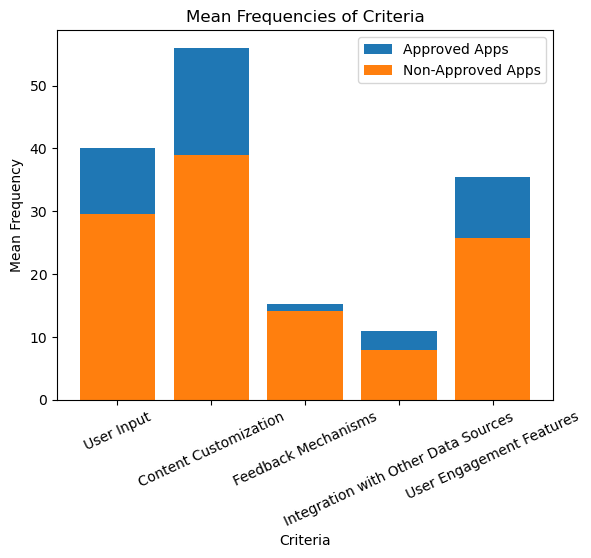

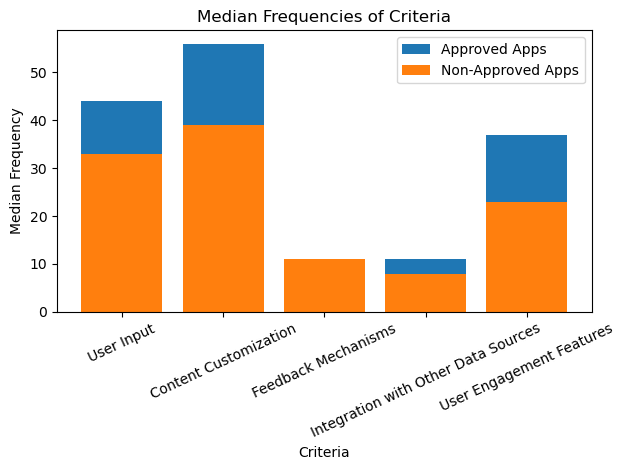

In [5]:
import matplotlib.pyplot as plt

# Calculate the mean frequencies for approved apps
approved_apps_mean_freq = {}
for criterion, frequencies in approved_apps_specific_freq.items():
    mean_frequency = sum(frequencies.values()) / len(frequencies)
    approved_apps_mean_freq[criterion] = mean_frequency

# Calculate the mean frequencies for non-approved apps
non_approved_apps_mean_freq = {}
for criterion, frequencies in non_approved_apps_specific_freq.items():
    mean_frequency = sum(frequencies.values()) / len(frequencies)
    non_approved_apps_mean_freq[criterion] = mean_frequency

# Create a bar chart
plt.xticks(rotation=25)
plt.bar(approved_apps_mean_freq.keys(), approved_apps_mean_freq.values(), label='Approved Apps')
plt.bar(non_approved_apps_mean_freq.keys(), non_approved_apps_mean_freq.values(), label='Non-Approved Apps')
plt.xlabel('Criteria')
plt.ylabel('Mean Frequency')
plt.title('Mean Frequencies of Criteria')
plt.legend()
plt.show()



# Calculate the median frequencies for approved apps
approved_apps_median_freq = {}
for criterion, frequencies in approved_apps_specific_freq.items():
    median_frequency = sorted(frequencies.values())[len(frequencies) // 2]
    approved_apps_median_freq[criterion] = median_frequency

# Calculate the median frequencies for non-approved apps
non_approved_apps_median_freq = {}
for criterion, frequencies in non_approved_apps_specific_freq.items():
    median_frequency = sorted(frequencies.values())[len(frequencies) // 2]
    non_approved_apps_median_freq[criterion] = median_frequency

# Create a bar chart

plt.bar(approved_apps_median_freq.keys(), approved_apps_median_freq.values(), label='Approved Apps')
plt.bar(non_approved_apps_median_freq.keys(), non_approved_apps_median_freq.values(), label='Non-Approved Apps')
plt.xlabel('Criteria')
plt.ylabel('Median Frequency')
plt.title('Median Frequencies of Criteria')
plt.xticks(rotation=25)
plt.legend()
plt.tight_layout()
plt.show()

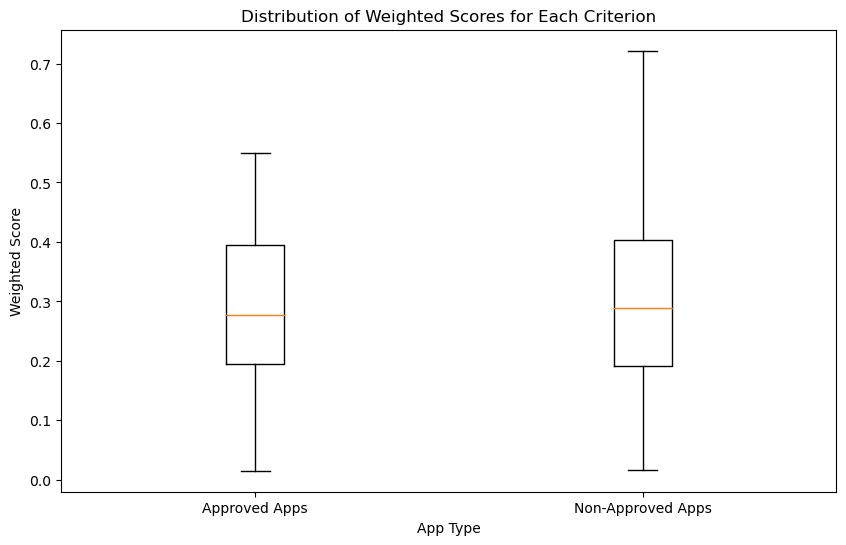

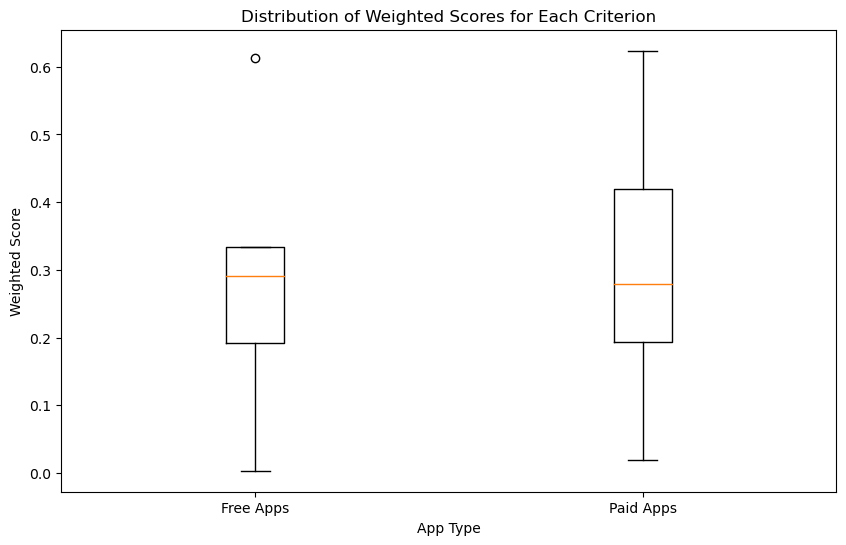

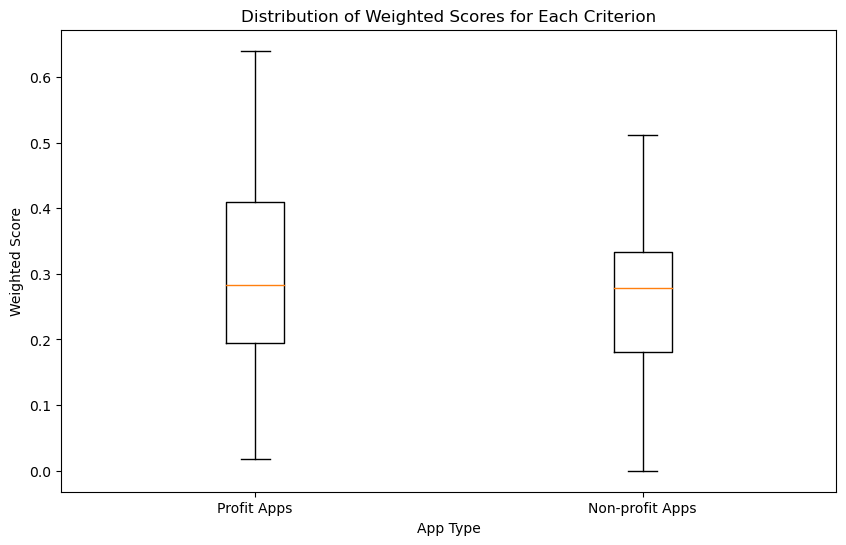

In [6]:
import matplotlib.pyplot as plt

# Extract the weighted scores for each criterion
approved_scores = list(approved_apps_weighted_scores.values())
non_approved_scores = list(non_approved_apps_weighted_scores.values())

# Create a boxplot for each criterion
plt.figure(figsize=(10, 6))  # Set figure size
plt.boxplot([approved_scores, non_approved_scores], labels=['Approved Apps', 'Non-Approved Apps'])

# Add labels and title
plt.xlabel('App Type')
plt.ylabel('Weighted Score')
plt.title('Distribution of Weighted Scores for Each Criterion')

# Display the plot
plt.show()


# Extract the weighted scores for each criterion
free_scores = list(totally_free_apps_weighted_scores.values())
paid_scores = list(paid_apps_weighted_scores.values())

# Create a boxplot for each criterion
plt.figure(figsize=(10, 6))  # Set figure size
plt.boxplot([free_scores, paid_scores], labels=['Free Apps', 'Paid Apps'])

# Add labels and title
plt.xlabel('App Type')
plt.ylabel('Weighted Score')
plt.title('Distribution of Weighted Scores for Each Criterion')

# Display the plot
plt.show()


# Extract the weighted scores for each criterion
profit_scores = list(profit_apps_weighted_scores.values())
non_profit_scores = list(non_profit_apps_weighted_scores.values())

# Create a boxplot for each criterion
plt.figure(figsize=(10, 6))  # Set figure size
plt.boxplot([profit_scores, non_profit_scores], labels=['Profit Apps', 'Non-profit Apps'])


# Add labels and title
plt.xlabel('App Type')
plt.ylabel('Weighted Score')
plt.title('Distribution of Weighted Scores for Each Criterion')

# Display the plot
plt.show()


Mean Frequencies for Each Criterion:
----------------------------------------
Approved Apps:
User Input: 40.0000
Content Customization: 56.0000
Feedback Mechanisms: 15.2308
Integration with Other Data Sources: 11.0000
User Engagement Features: 35.5000

Non-Approved Apps:
User Input: 29.5000
Content Customization: 39.0000
Feedback Mechanisms: 14.1538
Integration with Other Data Sources: 8.0000
User Engagement Features: 25.7500


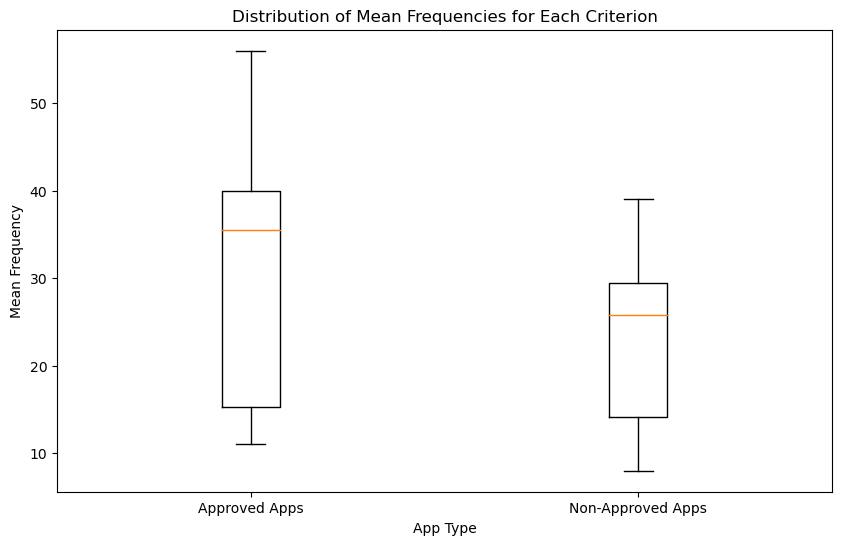

In [7]:
# Calculate mean frequencies for each criterion in approved apps
approved_criterion_means = {}
for criterion in approved_apps_specific_freq:
    freqs = [approved_apps_specific_freq[criterion][value] for value in approved_apps_specific_freq[criterion]]
    approved_criterion_means[criterion] = sum(freqs) / len(freqs)

# Calculate mean frequencies for each criterion in non-approved apps
non_approved_criterion_means = {}
for criterion in non_approved_apps_specific_freq:
    freqs = [non_approved_apps_specific_freq[criterion][value] for value in non_approved_apps_specific_freq[criterion]]
    non_approved_criterion_means[criterion] = sum(freqs) / len(freqs)

# Create a list of mean frequencies for each app type
approved_means = list(approved_criterion_means.values())
non_approved_means = list(non_approved_criterion_means.values())

# Print the results
print("\nMean Frequencies for Each Criterion:")
print("----------------------------------------")
print("Approved Apps:")
for criterion, mean_freq in approved_criterion_means.items():
    print(f"{criterion}: {mean_freq:.4f}")
print("\nNon-Approved Apps:")
for criterion, mean_freq in non_approved_criterion_means.items():
    print(f"{criterion}: {mean_freq:.4f}")

# Create the box plot
data = [approved_means, non_approved_means]
plt.figure(figsize=(10, 6))  # Adjust figure size for better visibility
plt.boxplot(data, labels=['Approved Apps', 'Non-Approved Apps'])
plt.xlabel('App Type')
plt.ylabel('Mean Frequency')
plt.title('Distribution of Mean Frequencies for Each Criterion')
plt.show()

Approved Apps Word Frequencies:
Non-Approved Apps Word Frequencies:


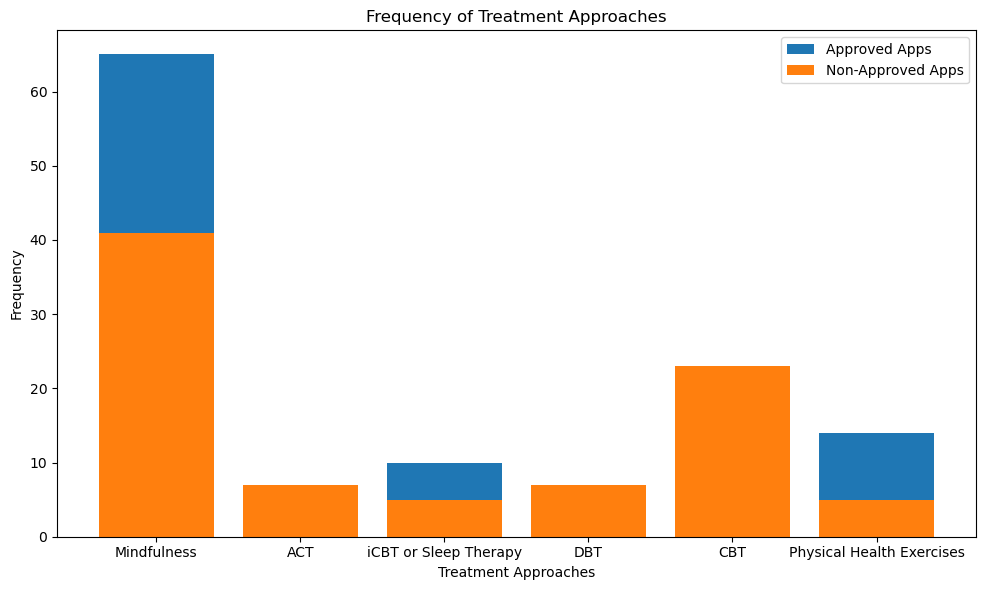

In [8]:
# Function to calculate word frequencies
def calculate_word_frequencies(df, dataset_name):
    print(f"{dataset_name} Word Frequencies:")
    word_freq = {}
    for col in df.columns:
        if col == 'treatmentApproaches':  # Check if column is treatmentApproaches
            if pd.api.types.is_string_dtype(df[col]):  # Check if column contains string values
                for index, row in df.iterrows():
                    if isinstance(row[col], str):  # Check if the value is a string
                        values = row[col].split(',')
                        for value in values:
                            value = value.strip()  # Remove leading/trailing whitespace
                            if value in word_freq:
                                word_freq[value] += 1
                            else:
                                word_freq[value] = 1
    return word_freq

# Calculate word frequencies for Approved apps
approved_apps_word_freq = calculate_word_frequencies(approved_apps, "Approved Apps")

# Calculate word frequencies for Non-Approved apps
non_approved_apps_word_freq = calculate_word_frequencies(non_approved_apps, "Non-Approved Apps")

# Create a figure with multiple subplots
fig, axs = plt.subplots(1, 1, figsize=(10, 6))

# Create a bar chart for treatmentApproaches
approved_apps_freqs = list(approved_apps_word_freq.values())
non_approved_apps_freqs = list(non_approved_apps_word_freq.values())
common_keys = set(approved_apps_word_freq.keys()) & set(non_approved_apps_word_freq.keys())
approved_apps_freqs = [approved_apps_word_freq[key] for key in common_keys]
non_approved_apps_freqs = [non_approved_apps_word_freq[key] for key in common_keys]

# Convert the common_keys to a list
common_keys = list(common_keys)

axs.bar(common_keys, approved_apps_freqs, label='Approved Apps')
axs.bar(common_keys, non_approved_apps_freqs, label='Non-Approved Apps')
axs.set_xlabel('Treatment Approaches')
axs.set_ylabel('Frequency')
axs.set_title('Frequency of Treatment Approaches')
axs.legend()

# Layout so plots do not overlap
fig.tight_layout()

# Display the plot
plt.show()

Approved Apps Word Frequencies:
Non-Approved Apps Word Frequencies:


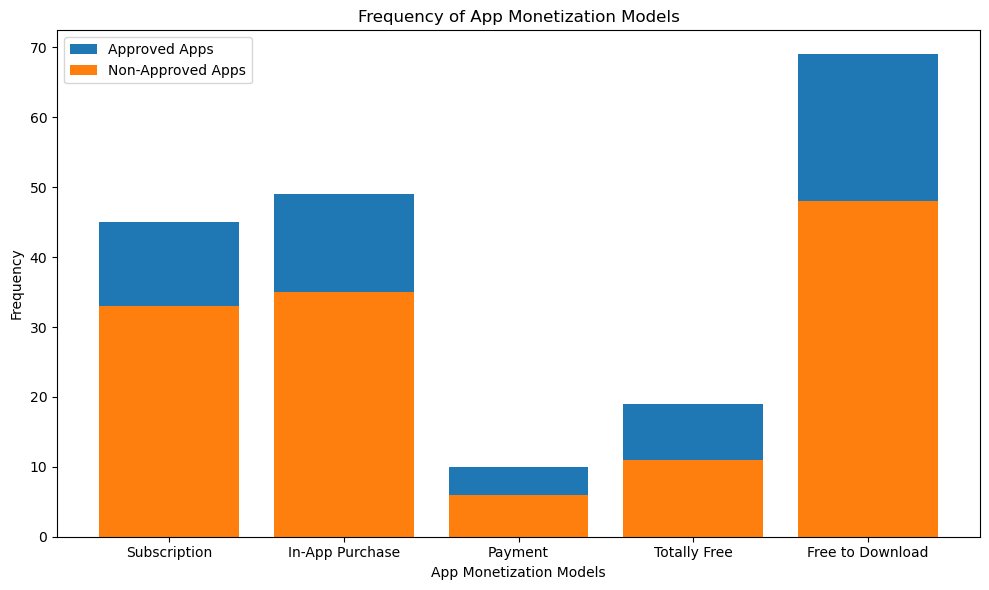

In [9]:
# Function to calculate word frequencies
def calculate_word_frequencies(df, dataset_name):
    print(f"{dataset_name} Word Frequencies:")
    word_freq = {}
    for col in df.columns:
        if col == 'costs':  # Check if column is treatmentApproaches
            if pd.api.types.is_string_dtype(df[col]):  # Check if column contains string values
                for index, row in df.iterrows():
                    if isinstance(row[col], str):  # Check if the value is a string
                        values = row[col].split(',')
                        for value in values:
                            value = value.strip()  # Remove leading/trailing whitespace
                            if value in word_freq:
                                word_freq[value] += 1
                            else:
                                word_freq[value] = 1
    return word_freq

# Calculate word frequencies for Approved apps
approved_apps_word_freq = calculate_word_frequencies(approved_apps, "Approved Apps")

# Calculate word frequencies for Non-Approved apps
non_approved_apps_word_freq = calculate_word_frequencies(non_approved_apps, "Non-Approved Apps")

# Create a figure with multiple subplots
fig, axs = plt.subplots(1, 1, figsize=(10, 6))

# Create a bar chart for treatmentApproaches
approved_apps_freqs = list(approved_apps_word_freq.values())
non_approved_apps_freqs = list(non_approved_apps_word_freq.values())
common_keys = set(approved_apps_word_freq.keys()) & set(non_approved_apps_word_freq.keys())
approved_apps_freqs = [approved_apps_word_freq[key] for key in common_keys]
non_approved_apps_freqs = [non_approved_apps_word_freq[key] for key in common_keys]

# Convert the common_keys to a list
common_keys = list(common_keys)

axs.bar(common_keys, approved_apps_freqs, label='Approved Apps')
axs.bar(common_keys, non_approved_apps_freqs, label='Non-Approved Apps')
axs.set_xlabel('App Monetization Models')
axs.set_ylabel('Frequency')
axs.set_title('Frequency of App Monetization Models')
axs.legend()

# Layout so plots do not overlap
fig.tight_layout()

# Display the plot
plt.show()

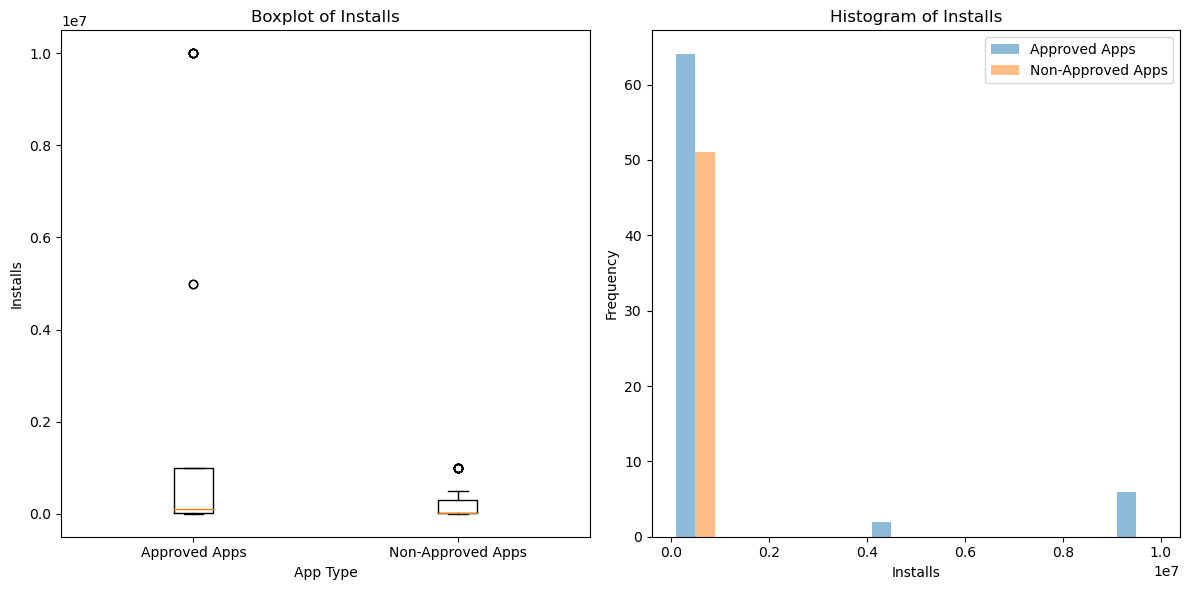

In [10]:

# Create a figure with multiple subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Create a boxplot for the 'installs' variable
axs[0].boxplot([approved_apps['installs'], non_approved_apps['installs']], labels=['Approved Apps', 'Non-Approved Apps'])
axs[0].set_xlabel('App Type')
axs[0].set_ylabel('Installs')
axs[0].set_title('Boxplot of Installs')

# Create a histogram for the 'installs' variable
axs[1].hist([approved_apps['installs'], non_approved_apps['installs']], label=['Approved Apps', 'Non-Approved Apps'], alpha=0.5)
axs[1].set_xlabel('Installs')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of Installs')
axs[1].legend()

# Layout so plots do not overlap
fig.tight_layout()

# Display the plot
plt.show()

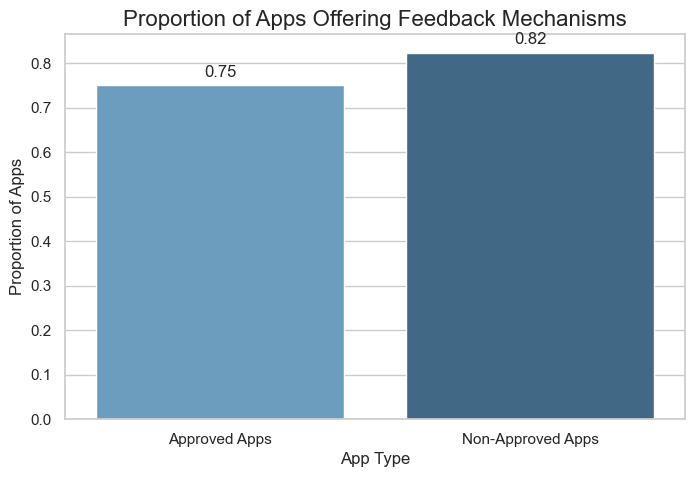

In [11]:
import seaborn as sns

# Function to calculate the proportion of apps offering feedback mechanisms
def calculate_feedback_mechanisms_proportion(df, app_type):
    feedback_conditions = [
        "engagements == 'AI Support'", "engagements == 'Real Time Response'", 
        "engagements == 'Peer Support'", "engagements == 'Chat/Message'", 
        "engagements == 'Network Support'", "engagements == 'Collaborative With Provider/Other'", 
        "engagements == 'Asynchronous Response'", "features == 'Goal Setting/Habits'", 
        "features == 'Track Mood'", "features == 'Track Symptoms'", 
        "features == 'Track Sleep'", "features == 'Track Medication'", "features == 'Journaling'"
    ]

    total_apps = len(df)
    feedback_offering_apps = 0

    # Iterate over each feedback condition and check how many apps offer at least one of them
    for index, row in df.iterrows():
        for condition in feedback_conditions:
            col, value = condition.split('==')
            col = col.strip()  # Clean column name
            value = value.strip().strip("'").lower()  # Clean and convert value to lowercase
            if col in df.columns and pd.api.types.is_string_dtype(df[col]):
                # Check for value as a substring (case insensitive)
                if value in str(row[col]).lower():
                    feedback_offering_apps += 1
                    break  # If any feedback mechanism is found, count this app and stop checking further conditions
    
    # Calculate the proportion
    proportion_feedback = feedback_offering_apps / total_apps
    return proportion_feedback

# Calculate feedback mechanisms proportion for Approved and Non-Approved Apps
approved_feedback_proportion = calculate_feedback_mechanisms_proportion(approved_apps, "Approved Apps")
non_approved_feedback_proportion = calculate_feedback_mechanisms_proportion(non_approved_apps, "Non-Approved Apps")

# Visualization using Matplotlib and Seaborn
def visualize_proportions(approved_proportion, non_approved_proportion):
    # Data for visualization
    data = {
        'App Type': ['Approved Apps', 'Non-Approved Apps'],
        'Proportion': [approved_proportion, non_approved_proportion]
    }
    
    # Create a DataFrame for the proportions
    df = pd.DataFrame(data)
    
    # Set the visual theme using seaborn
    sns.set_theme(style="whitegrid")
    
    # Create a bar plot
    plt.figure(figsize=(8, 5))
    sns.barplot(x='App Type', y='Proportion', data=df, palette='Blues_d')
    
    # Set chart labels and title
    plt.title('Proportion of Apps Offering Feedback Mechanisms', fontsize=16)
    plt.xlabel('App Type', fontsize=12)
    plt.ylabel('Proportion of Apps', fontsize=12)
    
    # Show the proportion values on the bars
    for i, value in enumerate(df['Proportion']):
        plt.text(i, value + 0.02, f'{value:.2f}', ha='center', fontsize=12)
    
    # Display the chart
    plt.show()

# Call the visualization function
visualize_proportions(approved_feedback_proportion, non_approved_feedback_proportion)


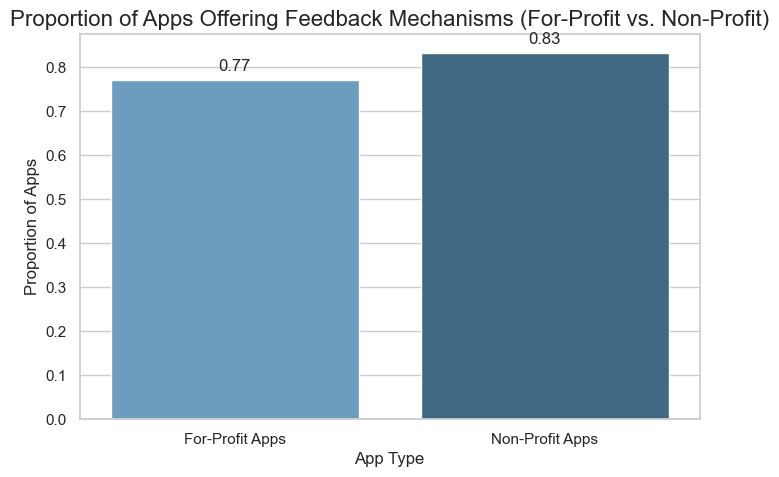

In [12]:
# Calculate feedback mechanisms proportion for For-Profit and Non-Profit Apps
profit_feedback_proportion = calculate_feedback_mechanisms_proportion(profit_apps, "For-Profit Apps")
non_profit_feedback_proportion = calculate_feedback_mechanisms_proportion(non_profit_apps, "Non-Profit Apps")

# Visualization using Matplotlib and Seaborn
def visualize_proportions(profit_proportion, non_profit_proportion):
    # Data for visualization
    data = {
        'App Type': ['For-Profit Apps', 'Non-Profit Apps'],
        'Proportion': [profit_proportion, non_profit_proportion]
    }
    
    # Create a DataFrame for the proportions
    df = pd.DataFrame(data)
    
    # Set the visual theme using seaborn
    sns.set_theme(style="whitegrid")
    
    # Create a bar plot
    plt.figure(figsize=(8, 5))
    sns.barplot(x='App Type', y='Proportion', data=df, palette='Blues_d')
    
    # Set chart labels and title
    plt.title('Proportion of Apps Offering Feedback Mechanisms (For-Profit vs. Non-Profit)', fontsize=16)
    plt.xlabel('App Type', fontsize=12)
    plt.ylabel('Proportion of Apps', fontsize=12)
    
    # Show the proportion values on the bars
    for i, value in enumerate(df['Proportion']):
        plt.text(i, value + 0.02, f'{value:.2f}', ha='center', fontsize=12)
    
    # Display the chart
    plt.show()
# Call the visualization function for profit and non-profit apps
visualize_proportions(profit_feedback_proportion, non_profit_feedback_proportion)


Standard Deviation of Weighted Scores (Totally Free Apps):
User Input: 0.0000
Content Customization: 0.0000
User Engagement Features: 0.0000
Feedback Mechanisms: 0.0000
Integration with Other Data Sources: 0.0000

Standard Deviation of Weighted Scores (Paid Apps):
User Input: 0.0000
Content Customization: 0.0000
User Engagement Features: 0.0000
Feedback Mechanisms: 0.0000
Integration with Other Data Sources: 0.0000


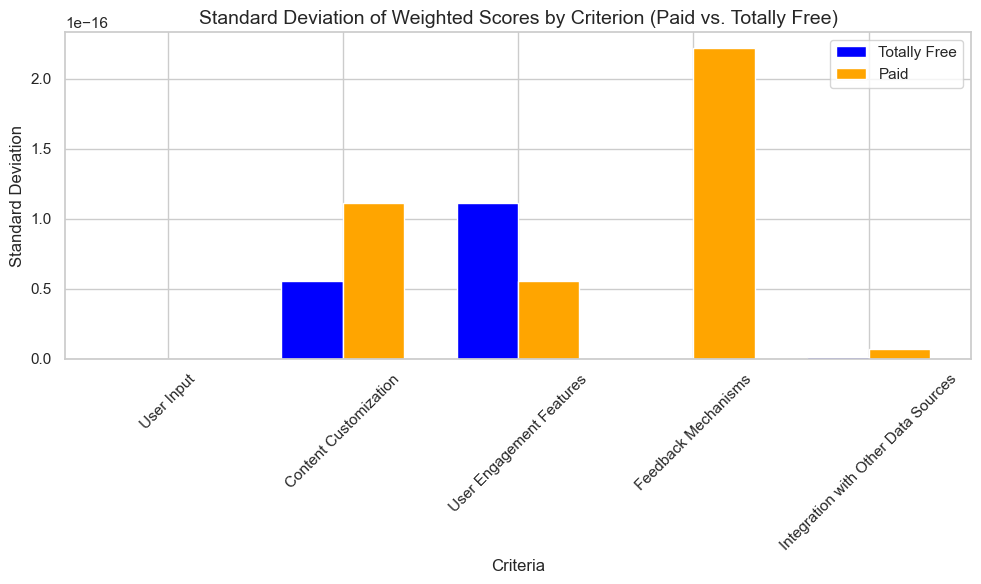

In [13]:
import numpy as np
import seaborn as sns

combined_apps = pd.concat([approved_apps, non_approved_apps], ignore_index=True)

# Create datasets for Totally Free apps and Paid apps
totally_free_apps = combined_apps[combined_apps['costs'].apply(lambda x: 'Totally Free' in x)]
paid_apps = combined_apps[~combined_apps['costs'].apply(lambda x: 'Totally Free' in x)]

# Define the weights for each criterion
weights = {
    'User Input': 0.25,
    'Content Customization': 0.25,
    'User Engagement Features': 0.20,
    'Feedback Mechanisms': 0.20,
    'Integration with Other Data Sources': 0.10
}

# Function to calculate word frequencies for specific values
def calculate_specific_word_frequencies(df, dataset_name, criterion_columns):
    specific_word_freq = {}
    for criterion, conditions in criterion_columns.items():
        specific_word_freq[criterion] = {}
        for condition in conditions:
            if '==' in condition:
                col, value = condition.split('==')
                col = col.strip()
                value = value.strip().strip("'").lower()
                if col in df.columns and pd.api.types.is_string_dtype(df[col]):
                    freq = df[col].apply(lambda x: value in str(x).lower() if isinstance(x, str) else False).sum()
                    specific_word_freq[criterion][value] = freq
    return specific_word_freq

# Define the criterion columns for word frequency calculations
criterion_columns = {
    'User Input': ["inputs == 'Diary'", "inputs == 'Surveys'"],
    'Content Customization': ["engagements == 'User Generated Data'"],
    'Feedback Mechanisms': [
        "engagements == 'AI Support'", "engagements == 'Real Time Response'", "engagements == 'Peer Support'", 
        "engagements == 'Chat/Message'", "engagements == 'Network Support'", 
        "engagements == 'Collaborative With Provider/Other'", "engagements == 'Asynchronous Response'", 
        "features == 'Goal Setting/Habits'", "features == 'Track Mood'", "features == 'Track Symptoms'", 
        "features == 'Track Sleep'", "features == 'Track Medication'", "features == 'Journaling'"
    ],
    'Integration with Other Data Sources': ["inputs == 'External Devices'"],
    'User Engagement Features': ["engagements == 'Audio/Music/Scripts'", "engagements == 'Gamification (Points/Badges)'", 
                                 "engagements == 'Videos'", "engagements == 'Assessments/Screenings'"]
}

# Function to calculate the weighted score for each criterion
def calculate_weighted_score(specific_freq, total_apps):
    weighted_scores = {}
    for criterion, weight in weights.items():
        criterion_score = 0
        if criterion in specific_freq:
            for value, freq in specific_freq[criterion].items():
                proportion = freq / total_apps
                weighted_proportion = proportion * weight
                criterion_score += weighted_proportion
        weighted_scores[criterion] = criterion_score
    return weighted_scores

# Function to calculate the weighted scores for each app
def calculate_weighted_scores_for_apps(df, criterion_columns):
    weighted_scores_per_app = []
    for index, row in df.iterrows():
        # Calculate specific frequencies for each app instead of using 'App'
        specific_freq = calculate_specific_word_frequencies(df, f"App {index}", criterion_columns)
        total_apps = len(df)
        weighted_scores = calculate_weighted_score(specific_freq, total_apps)
        weighted_scores_per_app.append(weighted_scores)
    return weighted_scores_per_app

# Calculate word frequencies and weighted scores for Totally Free and Paid apps
totally_free_apps_specific_freq = calculate_specific_word_frequencies(totally_free_apps, "Totally Free Apps", criterion_columns)
paid_apps_specific_freq = calculate_specific_word_frequencies(paid_apps, "Paid Apps", criterion_columns)

# Calculate the weighted scores for Totally Free and Paid apps
totally_free_weighted_scores = calculate_weighted_scores_for_apps(totally_free_apps, criterion_columns)
paid_weighted_scores = calculate_weighted_scores_for_apps(paid_apps, criterion_columns)

# Function to calculate the standard deviation for each criterion across apps
def calculate_std_for_criteria(weighted_scores_per_app, criterion):
    criterion_scores = [app_scores[criterion] for app_scores in weighted_scores_per_app if criterion in app_scores]
    std = np.std(criterion_scores)
    return std

# List of criteria
criteria_list = list(weights.keys())

# Calculate standard deviation for each criterion for Totally Free apps
std_totally_free = {}
for criterion in criteria_list:
    std_totally_free[criterion] = calculate_std_for_criteria(totally_free_weighted_scores, criterion)

# Calculate standard deviation for each criterion for Paid apps
std_paid = {}
for criterion in criteria_list:
    std_paid[criterion] = calculate_std_for_criteria(paid_weighted_scores, criterion)

# Print the standard deviation results for Totally Free apps
print("\nStandard Deviation of Weighted Scores (Totally Free Apps):")
for criterion, std_value in std_totally_free.items():
    print(f"{criterion}: {std_value:.4f}")

# Print the standard deviation results for Paid apps
print("\nStandard Deviation of Weighted Scores (Paid Apps):")
for criterion, std_value in std_paid.items():
    print(f"{criterion}: {std_value:.4f}")

# Visualization using Matplotlib and Seaborn

# Prepare data for visualization
data = {
    'Criterion': criteria_list,
    'Totally Free Std': [std_totally_free[criterion] for criterion in criteria_list],
    'Paid Std': [std_paid[criterion] for criterion in criteria_list]
}

# Create a DataFrame for visualization
df_vis = pd.DataFrame(data)

# Set the visual theme using seaborn
sns.set_theme(style="whitegrid")

# Create a bar plot for standard deviation across criteria
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(criteria_list))

# Bar plot for Totally Free apps
plt.bar(index, df_vis['Totally Free Std'], bar_width, label='Totally Free', color='blue')

# Bar plot for Paid apps
plt.bar(index + bar_width, df_vis['Paid Std'], bar_width, label='Paid', color='orange')

# Add labels and title
plt.xlabel('Criteria', fontsize=12)
plt.ylabel('Standard Deviation', fontsize=12)
plt.title('Standard Deviation of Weighted Scores by Criterion (Paid vs. Totally Free)', fontsize=14)
plt.xticks(index + bar_width / 2, criteria_list, rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


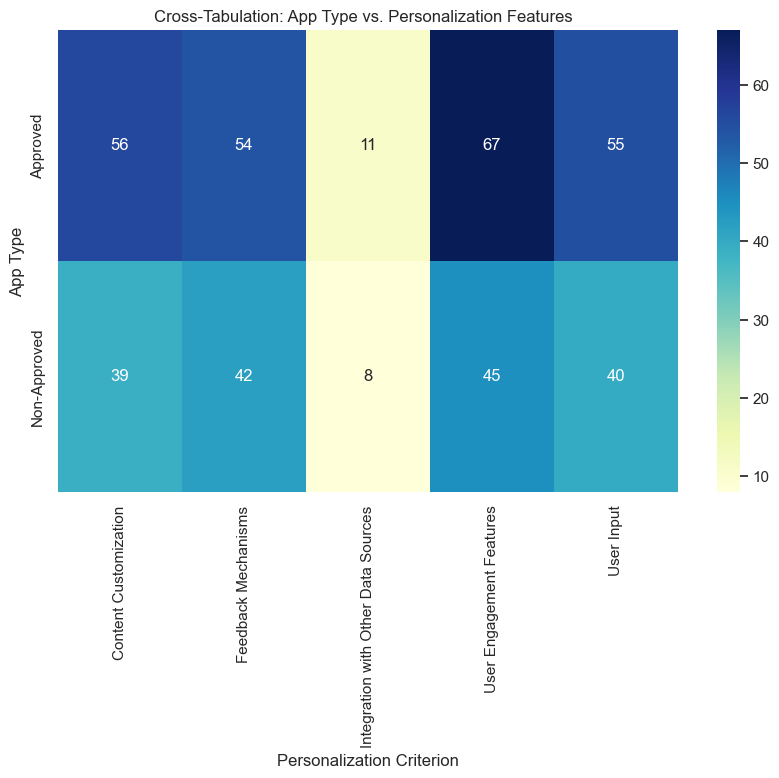

In [14]:
approved_apps = pd.read_csv('approved_Apps.csv')
non_approved_apps = pd.read_csv('nonApproved_Apps.csv')


# Combine the datasets for easier processing
approved_apps['App_Type'] = 'Approved'
non_approved_apps['App_Type'] = 'Non-Approved'

all_apps = pd.concat([approved_apps, non_approved_apps], ignore_index=True)

# Updated function to classify into multiple criteria
def classify_criterion_multiple(row):
    # Initialize an empty list to store all applicable criteria
    criteria = []
    
    # Check for each criterion and append to the list if it applies
    if 'Diary' in str(row['inputs']) or 'Surveys' in str(row['inputs']):
        criteria.append('User Input')
    
    if 'User Generated Data' in str(row['engagements']):
        criteria.append('Content Customization')
    
    if any(feat in str(row['features']) for feat in [
        'Goal Setting/Habits', 'Track Mood', 'Track Symptoms', 'Track Sleep',
        'Track Medication', 'Journaling'
    ]) or any(eng in str(row['engagements']) for eng in [
        'AI Support', 'Real Time Response', 'Peer Support', 'Chat/Message',
        'Network Support', 'Collaborative With Provider/Other', 'Asynchronous Response'
    ]):
        criteria.append('Feedback Mechanisms')
    
    if 'External Devices' in str(row['inputs']):
        criteria.append('Integration with Other Data Sources')
    
    if any(eng in str(row['engagements']) for eng in [
        'Audio/Music/Scripts', 'Gamification (Points/Badges)', 'Videos', 'Assessments/Screenings'
    ]):
        criteria.append('User Engagement Features')

    # Return a list of applicable criteria, or 'Other' if none apply
    return criteria 

# Apply the updated function to classify into multiple criteria
all_apps['Personalization Criterion'] = all_apps.apply(classify_criterion_multiple, axis=1)

# Explode the 'Personalization Criterion' column to break down multi-classified rows
all_apps_exploded = all_apps.explode('Personalization Criterion')

# Cross-tabulate app type (Approved vs. Non-Approved) with the personalization criterion
cross_tabulation = pd.crosstab(all_apps_exploded['App_Type'], all_apps_exploded['Personalization Criterion'])

# Display the cross-tabulation result
#print("\nCross-Tabulation of App Type vs. Personalization Criterion:")
#print(cross_tabulation)

# Save the cross-tabulation to CSV if needed
cross_tabulation.to_csv('cross_tabulation_personalization.csv')

# To visualize the cross-tabulation (optional), you can use seaborn or matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the cross-tabulation
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tabulation, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Cross-Tabulation: App Type vs. Personalization Features  ')
plt.xlabel('Personalization Criterion')
plt.ylabel('App Type')
plt.show()


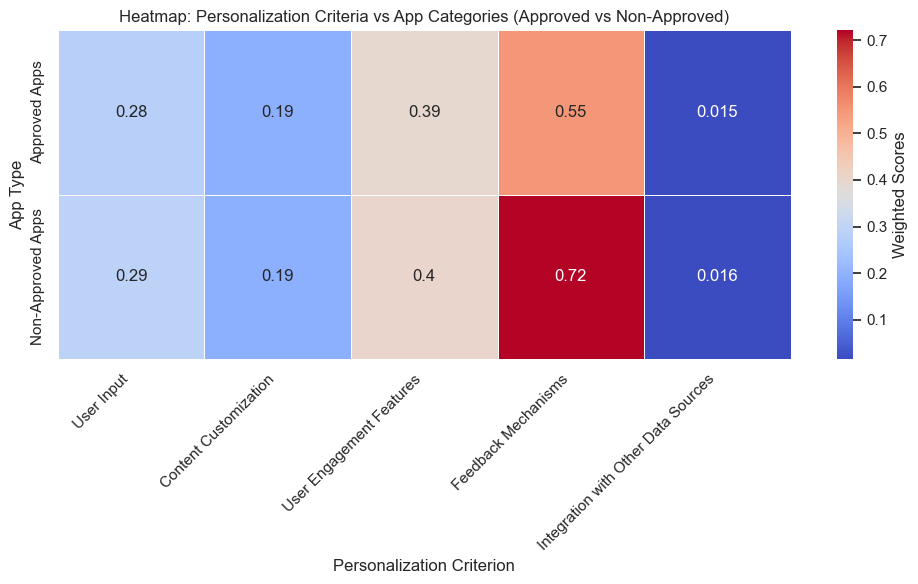

In [15]:

# Step 1: Gather the weighted scores into a DataFrame
# Data for the heatmap: Approved Apps and Non-Approved Apps weighted scores for each criterion
heatmap_data = pd.DataFrame({
    'Approved Apps': approved_apps_weighted_scores,
    'Non-Approved Apps': non_approved_apps_weighted_scores
})

# Step 2: Transpose the DataFrame to match heatmap layout (criteria on rows, app types on columns)
heatmap_data = heatmap_data.T

# Step 3: Plot the heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=0.5, cbar_kws={'label': 'Weighted Scores'})

# Step 4: Add titles and labels
plt.title('Heatmap: Personalization Criteria vs App Categories (Approved vs Non-Approved)')
plt.xlabel('Personalization Criterion')
plt.ylabel('App Type')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


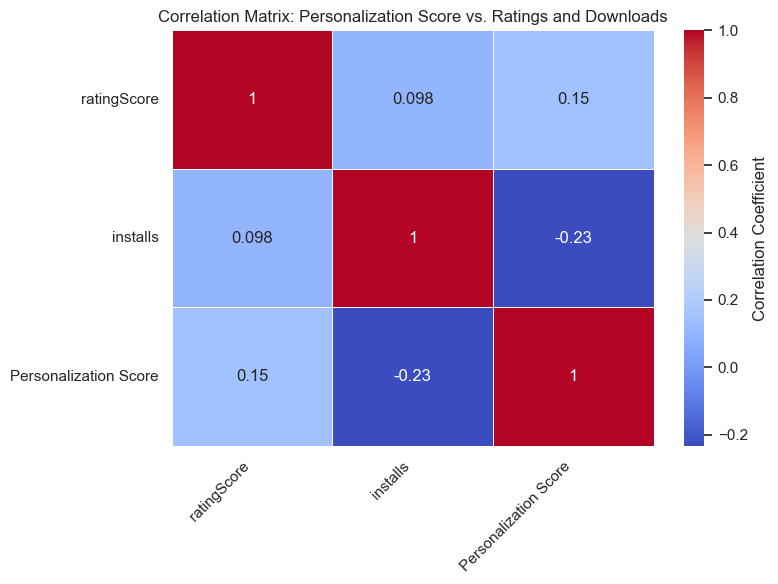

In [16]:


# Assuming you have personalization scores, user ratings, and number of downloads in your dataset.
# We create a DataFrame with these values.

# Example: If 'approved_apps' and 'non_approved_apps' datasets contain 'ratings' and 'downloads' columns.
# Combine personalization scores with other numerical variables (ratings and downloads)
# You can replace the following with actual columns in your dataset

# Assuming `approved_apps` and `non_approved_apps` datasets have 'ratings' and 'downloads' columns
approved_apps['Personalization Score'] = sum(approved_apps_weighted_scores.values())  # Add total personalization score for approved apps
non_approved_apps['Personalization Score'] = sum(non_approved_apps_weighted_scores.values())  # Add total personalization score for non-approved apps

# Create a new DataFrame that contains relevant numerical columns for correlation
# Replace 'ratings' and 'downloads' with actual column names in your dataset
data_approved = approved_apps[['ratingScore', 'installs', 'Personalization Score']].copy()
data_non_approved = non_approved_apps[['ratingScore', 'installs', 'Personalization Score']].copy()

# Concatenate approved and non-approved datasets for overall correlation analysis
combined_data = pd.concat([data_approved, data_non_approved], axis=0)

# Step 1: Calculate the correlation matrix for numerical columns (e.g., ratings, downloads, and personalization score)
correlation_matrix = combined_data.corr()

# Step 2: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'})

# Step 3: Add titles and labels
plt.title('Correlation Matrix: Personalization Score vs. Ratings and Downloads')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


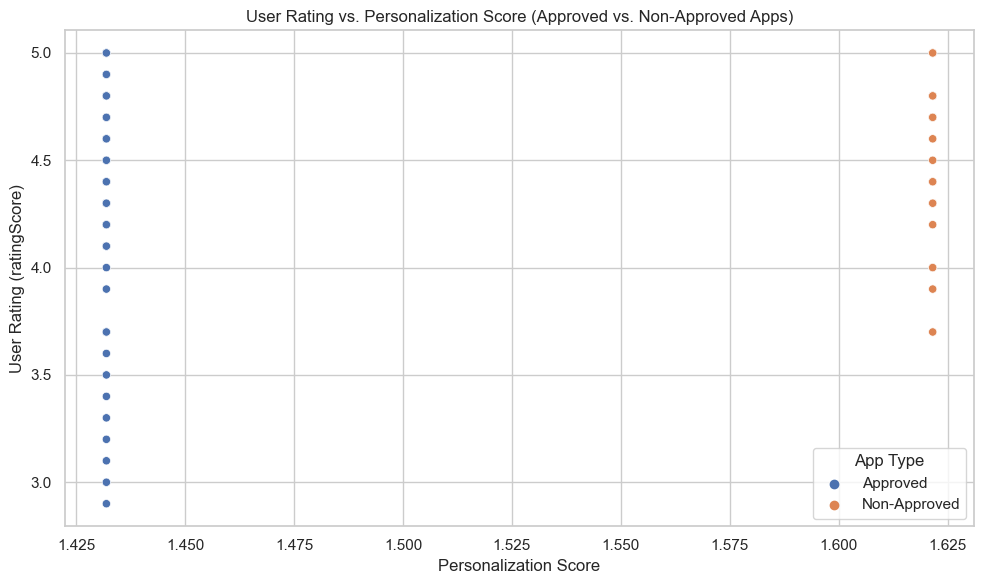

In [17]:
# Assuming both 'approved_apps' and 'non_approved_apps' are available

# Add a column to differentiate between approved and non-approved apps
approved_apps['App Type'] = 'Approved'
non_approved_apps['App Type'] = 'Non-Approved'

# Concatenate the two datasets for faceted plotting
combined_data = pd.concat([approved_apps, non_approved_apps])

# Ensure both 'Personalization Score' and 'ratingScore' are numeric in both datasets
combined_data['Personalization Score'] = pd.to_numeric(combined_data['Personalization Score'], errors='coerce')
combined_data['ratingScore'] = pd.to_numeric(combined_data['ratingScore'], errors='coerce')

# Drop any rows with missing values (optional)
combined_data = combined_data.dropna(subset=['Personalization Score', 'ratingScore'])

# Plotting the faceted scatterplots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Personalization Score', y='ratingScore', hue='App Type', data=combined_data)

# Customizing the plot
plt.title('User Rating vs. Personalization Score (Approved vs. Non-Approved Apps)')
plt.xlabel('Personalization Score')
plt.ylabel('User Rating (ratingScore)')
plt.legend(title='App Type')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


                   inputs                                        engagements  \
0                     NaN  Videos,  Audio/Music/Scripts,  Gamification (P...   
1  Diary,  Social Network  User Generated Data,  Audio/Music/Scripts,  As...   
2         Diary,  Surveys  User Generated Data,  Assessments/Screenings, ...   
3          Social Network  Gamification (Points/Badges),  Videos,  Audio/...   
4                     NaN                       Videos,  Audio/Music/Scripts   

                                            features  number_of_features  
0                                     Deep Breathing                   4  
1  Psychoeducation,  Productivity,  Journaling,  ...                   6  
2  Track Mood,  Productivity,  Psychoeducation,  ...                   9  
3                                     Deep Breathing                   3  
4                   Deep Breathing,  Psychoeducation                   2  


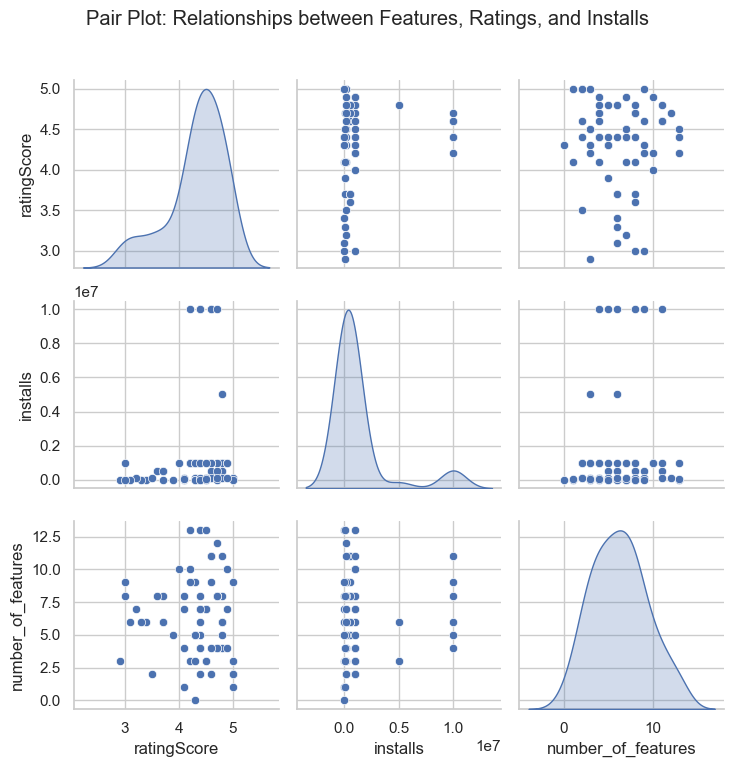

In [18]:



# Define a function to calculate the number of personalization features for each app
def count_personalization_features(row):
    count = 0
    
    # Check for User Input features
    if 'diary' in str(row['inputs']).lower():
        count += 1
    if 'surveys' in str(row['inputs']).lower():
        count += 1
    
    # Check for Content Customization features
    if 'user generated data' in str(row['engagements']).lower():
        count += 1
    
    # Check for Feedback Mechanisms
    feedback_features = ['ai support', 'real time response', 'peer support', 'goal setting/habits', 
                         'track mood', 'track symptoms', 'track sleep', 'track medication', 'journaling']
    for feature in feedback_features:
        if feature in str(row['engagements']).lower() or feature in str(row['features']).lower():
            count += 1
    
    # Check for Integration with Other Data Sources
    if 'external devices' in str(row['inputs']).lower():
        count += 1
    
    # Check for User Engagement Features
    engagement_features = ['audio/music/scripts', 'gamification (points/badges)', 'videos', 'assessments/screenings']
    for feature in engagement_features:
        if feature in str(row['engagements']).lower():
            count += 1
    
    return count

# Apply the function to calculate the number of personalization features for each app
approved_apps['number_of_features'] = approved_apps.apply(count_personalization_features, axis=1)

# Print a preview of the dataset with the new column
print(approved_apps[['inputs', 'engagements', 'features', 'number_of_features']].head())

# Create a pair plot to explore relationships between number_of_features, ratingScore, and installs
sns.pairplot(approved_apps[['ratingScore', 'installs', 'number_of_features']], diag_kind='kde')

# Add a title to the plot
plt.suptitle('Pair Plot: Relationships between Features, Ratings, and Installs', y=1.02)
plt.tight_layout()
plt.show()


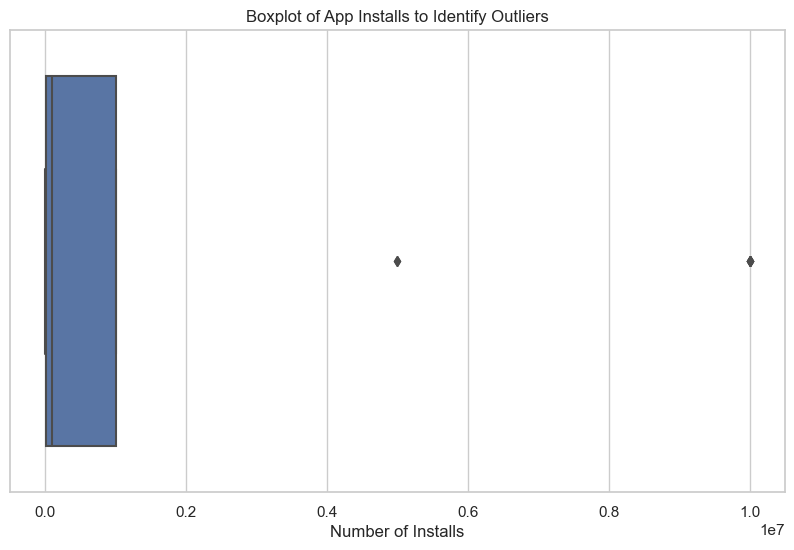

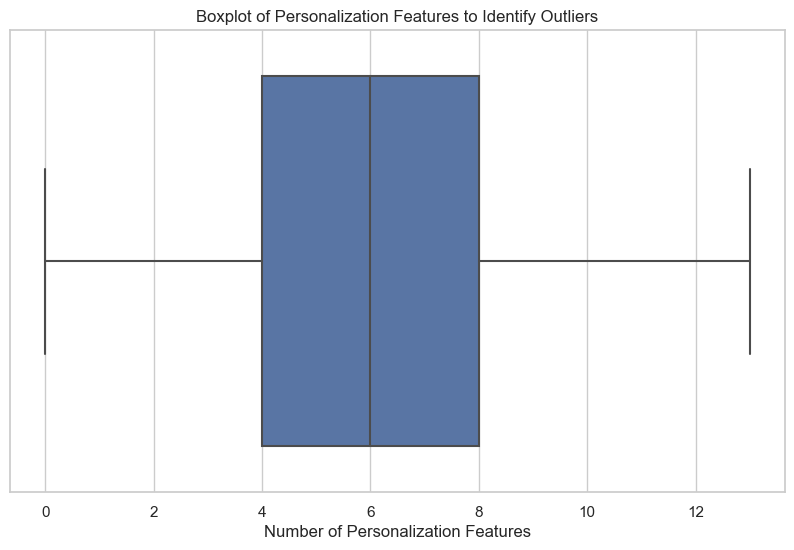

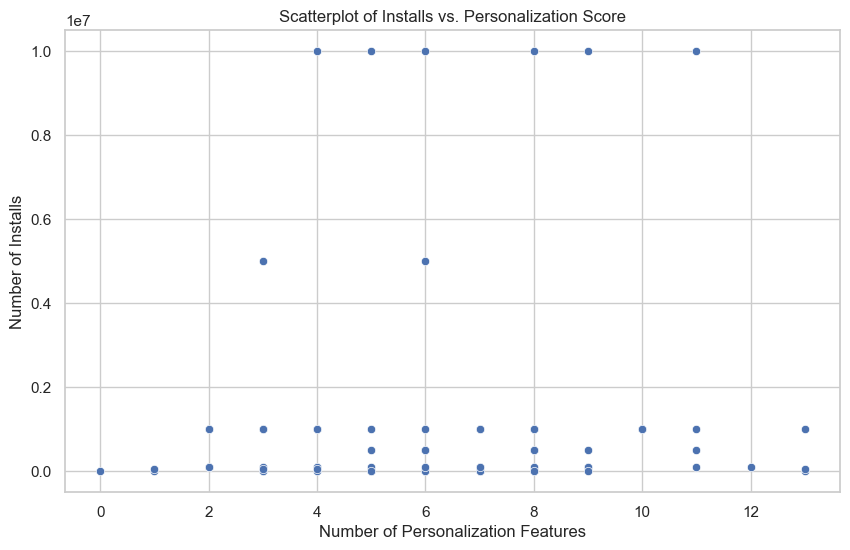

Outliers in the number of installs:
                             title  installs  number_of_features
3    Mindfulness with Petit BamBou   5000000                   3
27   Meditopia: Sleep & Meditation  10000000                  11
33   Headspace: Meditation & Sleep  10000000                   6
35   Insight Timer - Wellbeing App   5000000                   6
39  Calm -  Sleep, Meditate, Relax  10000000                   5
46      BetterSleep: Sleep tracker  10000000                   4
66      Noom: Weight Loss & Health  10000000                   9
71   Daylio Journal - Mood Tracker  10000000                   8
Outliers in the number of personalization features:
Empty DataFrame
Columns: [title, number_of_features, installs]
Index: []


In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Set the plotting style
sns.set(style="whitegrid")

### Boxplot for identifying outliers in the number of installs
plt.figure(figsize=(10, 6))
sns.boxplot(x=approved_apps['installs'])
plt.title('Boxplot of App Installs to Identify Outliers')
plt.xlabel('Number of Installs')
plt.show()

### Boxplot for identifying outliers in the personalization score
plt.figure(figsize=(10, 6))
sns.boxplot(x=approved_apps['number_of_features'])
plt.title('Boxplot of Personalization Features to Identify Outliers')
plt.xlabel('Number of Personalization Features')
plt.show()

### Scatterplot for identifying dominant apps in installs vs. personalization score
plt.figure(figsize=(10, 6))
sns.scatterplot(x=approved_apps['number_of_features'], y=approved_apps['installs'])
plt.title('Scatterplot of Installs vs. Personalization Score')
plt.xlabel('Number of Personalization Features')
plt.ylabel('Number of Installs')
plt.show()

# Optional: Identify outliers programmatically using IQR (Interquartile Range)
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Identify outliers in the installs column
install_outliers = identify_outliers(approved_apps, 'installs')
print("Outliers in the number of installs:")
print(install_outliers[['title', 'installs', 'number_of_features']])

# Identify outliers in the number_of_features (personalization score)
feature_outliers = identify_outliers(approved_apps, 'number_of_features')
print("Outliers in the number of personalization features:")
print(feature_outliers[['title', 'number_of_features', 'installs']])


In [20]:
import pandas as pd
import numpy as np
from scipy import stats

def calculate_app_personalization_score(app, criterion_columns, weights):
    score = 0
    for criterion, conditions in criterion_columns.items():
        criterion_score = 0
        for condition in conditions:
            col, value = condition.split('==')
            col = col.strip()
            value = value.strip().strip("'").lower()
            if col in app.index and isinstance(app[col], str) and value in app[col].lower():
                criterion_score += 1
        score += (criterion_score / len(conditions)) * weights[criterion]
    return score

# Add personalization score to each dataset (approved and non-approved)
approved_apps['personalization_score'] = approved_apps.apply(lambda x: calculate_app_personalization_score(x, criterion_columns, weights), axis=1)
non_approved_apps['personalization_score'] = non_approved_apps.apply(lambda x: calculate_app_personalization_score(x, criterion_columns, weights), axis=1)

# Define the T-test function for approved vs. non-approved apps
def personalization_score_ttest_approved_vs_non_approved(approved_apps, non_approved_apps):
    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(
        approved_apps['personalization_score'],
        non_approved_apps['personalization_score']
    )
    
    # Print results
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")
    
    # Interpret results
    alpha = 0.05  # significance level
    if p_value < alpha:
        print("The difference in personalization scores between approved and non-approved apps is statistically significant.")
    else:
        print("There is no statistically significant difference in personalization scores between approved and non-approved apps.")
    
    # Calculate and print mean scores
    mean_approved = np.mean(approved_apps['personalization_score'])
    mean_non_approved = np.mean(non_approved_apps['personalization_score'])
    print(f"\nMean personalization score for approved apps: {mean_approved:.4f}")
    print(f"Mean personalization score for non-approved apps: {mean_non_approved:.4f}")
    
    # Calculate and print effect size (Cohen's d)
    n1, n2 = len(approved_apps), len(non_approved_apps)
    s1, s2 = np.std(approved_apps['personalization_score'], ddof=1), np.std(non_approved_apps['personalization_score'], ddof=1)
    pooled_std = np.sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
    cohen_d = (mean_non_approved - mean_approved) / pooled_std
    print(f"\nEffect size (Cohen's d): {cohen_d:.4f}")
    
    # Interpret effect size
    if abs(cohen_d) < 0.2:
        print("The effect size is small.")
    elif abs(cohen_d) < 0.5:
        print("The effect size is medium.")
    else:
        print("The effect size is large.")

# Ensure both datasets have the 'personalization_score' column
if 'personalization_score' not in approved_apps.columns or 'personalization_score' not in non_approved_apps.columns:
    print("Please make sure both datasets have a 'personalization_score' column.")
else:
    personalization_score_ttest_approved_vs_non_approved(approved_apps, non_approved_apps)


T-statistic: -0.4407319445408821
P-value: 0.6601934809168335
There is no statistically significant difference in personalization scores between approved and non-approved apps.

Mean personalization score for approved apps: 0.4895
Mean personalization score for non-approved apps: 0.5080

Effect size (Cohen's d): 0.0807
The effect size is small.


In [25]:
import pandas as pd
import numpy as np
from scipy import stats

def calculate_app_personalization_score(app, criterion_columns, weights):
    score = 0
    for criterion, conditions in criterion_columns.items():
        criterion_score = 0
        for condition in conditions:
            col, value = condition.split('==')
            col = col.strip()
            value = value.strip().strip("'").lower()
            if col in app.index and isinstance(app[col], str) and value in app[col].lower():
                criterion_score += 1
        score += (criterion_score / len(conditions)) * weights[criterion]
    return score

def personalization_score_ttest_profit_vs_non_profit(profit_apps, non_profit_apps):
    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(
        profit_apps['personalization_score'],
        non_profit_apps['personalization_score']
    )
    
    # Print results
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")
    
    # Interpret results
    alpha = 0.05  # significance level
    if p_value < alpha:
        print("The difference in personalization scores between Profit and Non-profit apps is statistically significant.")
    else:
        print("There is no statistically significant difference in personalization scores between Profit and Non-profit apps.")

    # Calculate and print mean scores
    mean_profit = np.mean(profit_apps['personalization_score'])
    mean_non_profit = np.mean(non_profit_apps['personalization_score'])
    print(f"\nMean personalization score for profit apps: {mean_profit:.4f}")
    print(f"Mean personalization score for non-profit apps: {mean_non_profit:.4f}")
    
    # Calculate and print effect size (Cohen's d)
    n1, n2 = len(profit_apps), len(non_profit_apps)
    s1, s2 = np.std(profit_apps['personalization_score'], ddof=1), np.std(non_profit_apps['personalization_score'], ddof=1)
    pooled_std = np.sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
    cohen_d = (mean_non_profit - mean_profit) / pooled_std
    print(f"\nEffect size (Cohen's d): {cohen_d:.4f}")
    
    # Interpret effect size
    if abs(cohen_d) < 0.2:
        print("The effect size is small.")
    elif abs(cohen_d) < 0.5:
        print("The effect size is medium.")
    else:
        print("The effect size is large.")

# Add personalization score to each dataset
profit_apps['personalization_score'] = profit_apps.apply(lambda x: calculate_app_personalization_score(x, criterion_columns, weights), axis=1)
non_profit_apps['personalization_score'] = non_profit_apps.apply(lambda x: calculate_app_personalization_score(x, criterion_columns, weights), axis=1)

# Now run the t-test
personalization_score_ttest_profit_vs_non_profit(profit_apps, non_profit_apps)

# Ensure both datasets have the 'personalization_score' column
#if 'personalization_score' not in totally_free_apps.columns or 'personalization_score' not in paid_apps.columns:
 #   print("Please make sure both datasets have a 'personalization_score' column.")
#else:
 #   personalization_score_ttest_paid_vs_free(totally_free_apps, paid_apps)


T-statistic: 1.1118669323367107
P-value: 0.26839965152374196
There is no statistically significant difference in personalization scores between Profit and Non-profit apps.

Mean personalization score for profit apps: 0.5066
Mean personalization score for non-profit apps: 0.4421

Effect size (Cohen's d): -0.2836
The effect size is medium.


In [26]:
import pandas as pd
import numpy as np
from scipy import stats

def calculate_app_personalization_score(app, criterion_columns, weights):
    score = 0
    for criterion, conditions in criterion_columns.items():
        criterion_score = 0
        for condition in conditions:
            col, value = condition.split('==')
            col = col.strip()
            value = value.strip().strip("'").lower()
            if col in app.index and isinstance(app[col], str) and value in app[col].lower():
                criterion_score += 1
        score += (criterion_score / len(conditions)) * weights[criterion]
    return score

# Add personalization score to each dataset
totally_free_apps['personalization_score'] = totally_free_apps.apply(lambda x: calculate_app_personalization_score(x, criterion_columns, weights), axis=1)
paid_apps['personalization_score'] = paid_apps.apply(lambda x: calculate_app_personalization_score(x, criterion_columns, weights), axis=1)



def personalization_score_ttest_paid_vs_free(totally_free_apps, paid_apps):
    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(
        totally_free_apps['personalization_score'],
        paid_apps['personalization_score']
    )
    
    # Print results
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")
    
    # Interpret results
    alpha = 0.05  # significance level
    if p_value < alpha:
        print("The difference in personalization scores between paid and totally free apps is statistically significant.")
    else:
        print("There is no statistically significant difference in personalization scores between paid and totally free apps.")
    
    # Calculate and print mean scores
    mean_free = np.mean(totally_free_apps['personalization_score'])
    mean_paid = np.mean(paid_apps['personalization_score'])
    print(f"\nMean personalization score for totally free apps: {mean_free:.4f}")
    print(f"Mean personalization score for paid apps: {mean_paid:.4f}")
    
    # Calculate and print effect size (Cohen's d)
    n1, n2 = len(totally_free_apps), len(paid_apps)
    s1, s2 = np.std(totally_free_apps['personalization_score'], ddof=1), np.std(paid_apps['personalization_score'], ddof=1)
    pooled_std = np.sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
    cohen_d = (mean_paid - mean_free) / pooled_std
    print(f"\nEffect size (Cohen's d): {cohen_d:.4f}")
    
    # Interpret effect size
    if abs(cohen_d) < 0.2:
        print("The effect size is small.")
    elif abs(cohen_d) < 0.5:
        print("The effect size is medium.")
    else:
        print("The effect size is large.")
# Now run the t-test
personalization_score_ttest_paid_vs_free(totally_free_apps, paid_apps)
        
# Ensure both datasets have the 'personalization_score' column
#if 'personalization_score' not in totally_free_apps.columns or 'personalization_score' not in paid_apps.columns:
 #   print("Please make sure both datasets have a 'personalization_score' column.")
#else:
 #   personalization_score_ttest_paid_vs_free(totally_free_apps, paid_apps)

T-statistic: -0.7130058418750735
P-value: 0.4772149569091404
There is no statistically significant difference in personalization scores between paid and totally free apps.

Mean personalization score for totally free apps: 0.4713
Mean personalization score for paid apps: 0.5055

Effect size (Cohen's d): 0.1497
The effect size is small.


C:\Users\amari\AppData\Local\Temp\ipykernel_11920\2831858856.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totally_free_apps['personalization_score'] = totally_free_apps.apply(lambda x: calculate_app_personalization_score(x, criterion_columns, weights), axis=1)
C:\Users\amari\AppData\Local\Temp\ipykernel_11920\2831858856.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_apps['personalization_score'] = paid_apps.apply(lambda x: calculate_app_personalization_score(x, criterion_columns, weights)

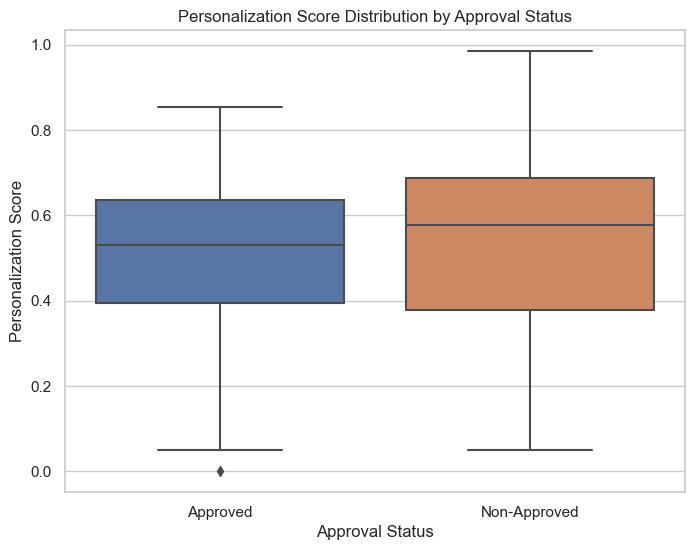

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine approved and non-approved data for visualization
approved_apps['Approval Status'] = 'Approved'
non_approved_apps['Approval Status'] = 'Non-Approved'
combined_data = pd.concat([approved_apps, non_approved_apps])

# Create a boxplot for personalization scores
plt.figure(figsize=(8, 6))
sns.boxplot(data=combined_data, x='Approval Status', y='personalization_score')
plt.title('Personalization Score Distribution by Approval Status')
plt.xlabel('Approval Status')
plt.ylabel('Personalization Score')
plt.show()


Correlation analysis on merged dataset:
Correlation between personalization score and rating score: -0.0814 (p-value: 0.4380)
Correlation between personalization score and installs: 0.0919 (p-value: 0.3808)
Correlation between rating score and installs: 0.0981 (p-value: 0.3495)


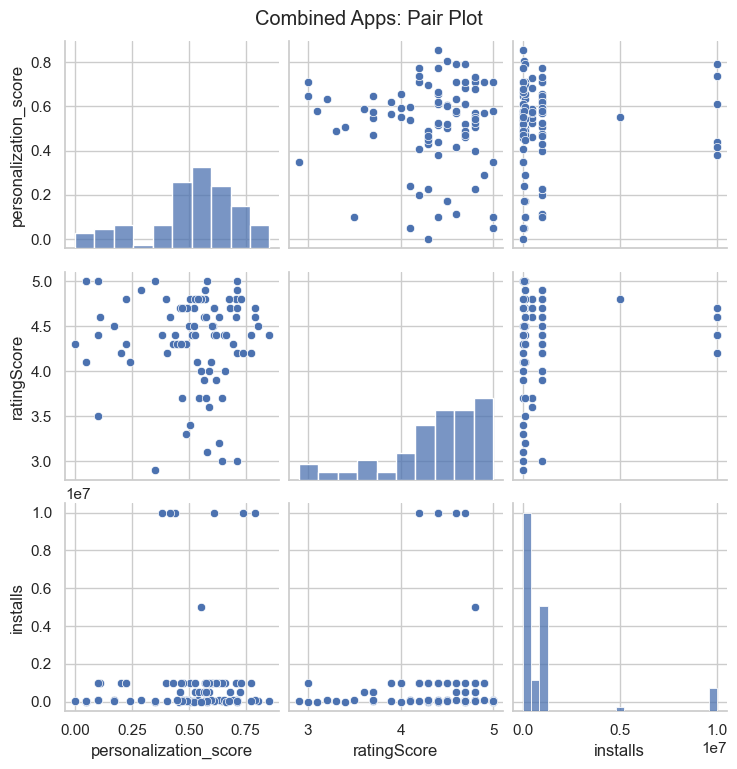


Regression analysis for rating score on personalization score:
                            OLS Regression Results                            
Dep. Variable:            ratingScore   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.6067
Date:                Thu, 31 Oct 2024   Prob (F-statistic):              0.438
Time:                        17:41:42   Log-Likelihood:                -66.301
No. Observations:                  93   AIC:                             136.6
Df Residuals:                      91   BIC:                             141.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [29]:
# Merge the two datasets with an identifier for app type
approved_apps['App Type'] = 'Approved'
non_approved_apps['App Type'] = 'Non-Approved'
combined_apps = pd.concat([approved_apps, non_approved_apps], ignore_index=True)

# Drop rows with NaN or infinite values in 'personalization_score', 'ratingScore', or 'installs'
combined_apps_clean = combined_apps[['personalization_score', 'ratingScore', 'installs']].replace([np.inf, -np.inf], np.nan).dropna()

# Correlation analysis on merged data
personalization_rating_corr, p_value_rating = pearsonr(combined_apps_clean['personalization_score'], combined_apps_clean['ratingScore'])
personalization_installs_corr, p_value_installs = pearsonr(combined_apps_clean['personalization_score'], combined_apps_clean['installs'])
rating_installs_corr, p_value_rating_installs = pearsonr(combined_apps_clean['ratingScore'], combined_apps_clean['installs'])

print("Correlation analysis on merged dataset:")
print(f"Correlation between personalization score and rating score: {personalization_rating_corr:.4f} (p-value: {p_value_rating:.4f})")
print(f"Correlation between personalization score and installs: {personalization_installs_corr:.4f} (p-value: {p_value_installs:.4f})")
print(f"Correlation between rating score and installs: {rating_installs_corr:.4f} (p-value: {p_value_rating_installs:.4f})")

# Visualization of correlations using pairplot
sns.pairplot(combined_apps_clean[['personalization_score', 'ratingScore', 'installs']])
plt.suptitle('Combined Apps: Pair Plot', y=1.02)
plt.show()

# Simple linear regression for personalization score and rating score on merged data
X_rating = sm.add_constant(combined_apps_clean['personalization_score'])
y_rating = combined_apps_clean['ratingScore']
model_rating = sm.OLS(y_rating, X_rating).fit()
print("\nRegression analysis for rating score on personalization score:")
print(model_rating.summary())

# Simple linear regression for personalization score and installs on merged data
X_installs = sm.add_constant(combined_apps_clean['personalization_score'])
y_installs = combined_apps_clean['installs']
model_installs = sm.OLS(y_installs, X_installs).fit()
print("\nRegression analysis for installs on personalization score:")
print(model_installs.summary())


In [30]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Load the datasets
approved_apps = pd.read_csv('approved_Apps.csv')
non_approved_apps = pd.read_csv('nonApproved_Apps.csv')

# Add an 'approved' column to each dataset
approved_apps['approved'] = 1
non_approved_apps['approved'] = 0

# Combine the datasets
all_apps = pd.concat([approved_apps, non_approved_apps], ignore_index=True)

# Define the criteria and relevant columns
criterion_columns = {
    'User Input': ["inputs == 'Diary'", "inputs == 'Surveys'"],
    'Content Customization': ["engagements == 'User Generated Data'"],
    'Feedback Mechanisms': [
        "engagements == 'AI Support'", "engagements == 'Real Time Response'", "engagements == 'Peer Support'", 
        "engagements == 'Chat/Message'", "engagements == 'Network Support'", 
        "engagements == 'Collaborative With Provider/Other'", "engagements == 'Asynchronous Response'", 
        "features == 'Goal Setting/Habits'", "features == 'Track Mood'", "features == 'Track Symptoms'", 
        "features == 'Track Sleep'", "features == 'Track Medication'", "features == 'Journaling'"
    ],
    'Integration with Other Data Sources': ["inputs == 'External Devices'"],
    'User Engagement Features': ["engagements == 'Audio/Music/Scripts'", "engagements == 'Gamification (Points/Badges)'", 
                                 "engagements == 'Videos'", "engagements == 'Assessments/Screenings'"]
}

def perform_chi_squared_test(df, criterion, conditions):
    # Create a boolean column for the criterion
    df[criterion] = df.eval(' | '.join(conditions)).astype(int)
    
    # Create the contingency table
    contingency_table = pd.crosstab(df['approved'], df[criterion])
    
    # Perform chi-squared test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    return chi2, p_value, contingency_table

# Perform chi-squared test for each criterion
results = {}
for criterion, conditions in criterion_columns.items():
    chi2, p_value, contingency_table = perform_chi_squared_test(all_apps, criterion, conditions)
    results[criterion] = {
        'chi2': chi2,
        'p_value': p_value,
        'contingency_table': contingency_table
    }

# Print results
for criterion, result in results.items():
    print(f"\nCriterion: {criterion}")
    print("Contingency Table:")
    print(result['contingency_table'])
    print(f"Chi-squared statistic: {result['chi2']:.4f}")
    print(f"p-value: {result['p_value']:.4f}")
    
    if result['p_value'] <= 0.05:
        print("Conclusion: There is a significant relationship between app approval and this criterion.")
    else:
        print("Conclusion: There is no significant relationship between app approval and this criterion.")

# Calculate and print the percentage of approved and non-approved apps
total_apps = len(all_apps)
approved_percentage = (all_apps['approved'] == 1).sum() / total_apps * 100
non_approved_percentage = (all_apps['approved'] == 0).sum() / total_apps * 100

print(f"\nPercentage of approved apps: {approved_percentage:.2f}%")
print(f"Percentage of non-approved apps: {non_approved_percentage:.2f}%")


Criterion: User Input
Contingency Table:
User Input   0  1
approved         
0           43  8
1           67  5
Chi-squared statistic: 1.5774
p-value: 0.2091
Conclusion: There is no significant relationship between app approval and this criterion.

Criterion: Content Customization
Contingency Table:
Content Customization   0  1
approved                    
0                      49  2
1                      70  2
Chi-squared statistic: 0.0000
p-value: 1.0000
Conclusion: There is no significant relationship between app approval and this criterion.

Criterion: Feedback Mechanisms
Contingency Table:
Feedback Mechanisms   0
approved               
0                    51
1                    72
Chi-squared statistic: 0.0000
p-value: 1.0000
Conclusion: There is no significant relationship between app approval and this criterion.

Criterion: Integration with Other Data Sources
Contingency Table:
Integration with Other Data Sources   0  1
approved                                  
0        